In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
cd /users/user/Desktop/Data Sets/

C:\users\user\Desktop\Data Sets


In [34]:
df = pd.read_csv('aapl.csv')

In [35]:
df.head()

,Unnamed: 0,adj_close,close,date,high,low,open,volume
0,0,31.68,130.31,2000-03-01,132.06,118.50,118.56,38478000
1,1,29.66,122.00,2000-03-02,127.94,120.69,127.00,11136800
2,2,31.12,128.00,2000-03-03,128.23,120.00,124.87,11565200
3,3,30.56,125.69,2000-03-06,129.13,125.00,126.00,7520000
4,4,29.87,122.87,2000-03-07,127.44,121.12,126.44,9767600


In [36]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [37]:
df.describe()

,adj_close,close,high,low,open,volume
count,3270.000000,3270.000000,3270.000000,3270.000000,3270.000000,3.270000e+03
mean,140.505248,151.108138,153.017789,149.103336,151.216673,2.151112e+07
std,165.408965,165.277867,166.815882,163.681717,165.485538,1.482164e+07
min,6.380000,13.120000,13.190000,12.720000,12.990000,1.405000e+06
25%,12.020000,24.712500,25.060000,24.092500,24.592500,1.159570e+07
50%,72.410000,85.340000,86.500000,84.355000,85.415000,1.730015e+07
75%,192.572500,198.010000,200.762500,196.027500,198.957500,2.744490e+07
max,685.760000,702.100000,705.070000,699.570000,702.410000,2.650690e+08


In [38]:
df.head()

,adj_close,close,date,high,low,open,volume
0,31.68,130.31,2000-03-01,132.06,118.50,118.56,38478000
1,29.66,122.00,2000-03-02,127.94,120.69,127.00,11136800
2,31.12,128.00,2000-03-03,128.23,120.00,124.87,11565200
3,30.56,125.69,2000-03-06,129.13,125.00,126.00,7520000
4,29.87,122.87,2000-03-07,127.44,121.12,126.44,9767600


In [39]:
df.isnull().sum()

adj_close    0
close        0
date         0
high         0
low          0
open         0
volume       0
dtype: int64

In [40]:
df.columns

Index(['adj_close', 'close', 'date', 'high', 'low', 'open', 'volume'], dtype='object')

In [41]:
df.shape

(3270, 7)

<h1> Checking for correlation</h1>

In [52]:
df.corr()

,adj_close,close,high,low,open,volume
adj_close,1.000000,0.996564,0.996325,0.996577,0.996358,0.036967
close,0.996564,1.000000,0.999893,0.999882,0.999768,0.024636
high,0.996325,0.999893,1.000000,0.999840,0.999912,0.028510
low,0.996577,0.999882,0.999840,1.000000,0.999865,0.020534
open,0.996358,0.999768,0.999912,0.999865,1.000000,0.025638
volume,0.036967,0.024636,0.028510,0.020534,0.025638,1.000000


C:\Users\user\.conda\envs\dataS-venv\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


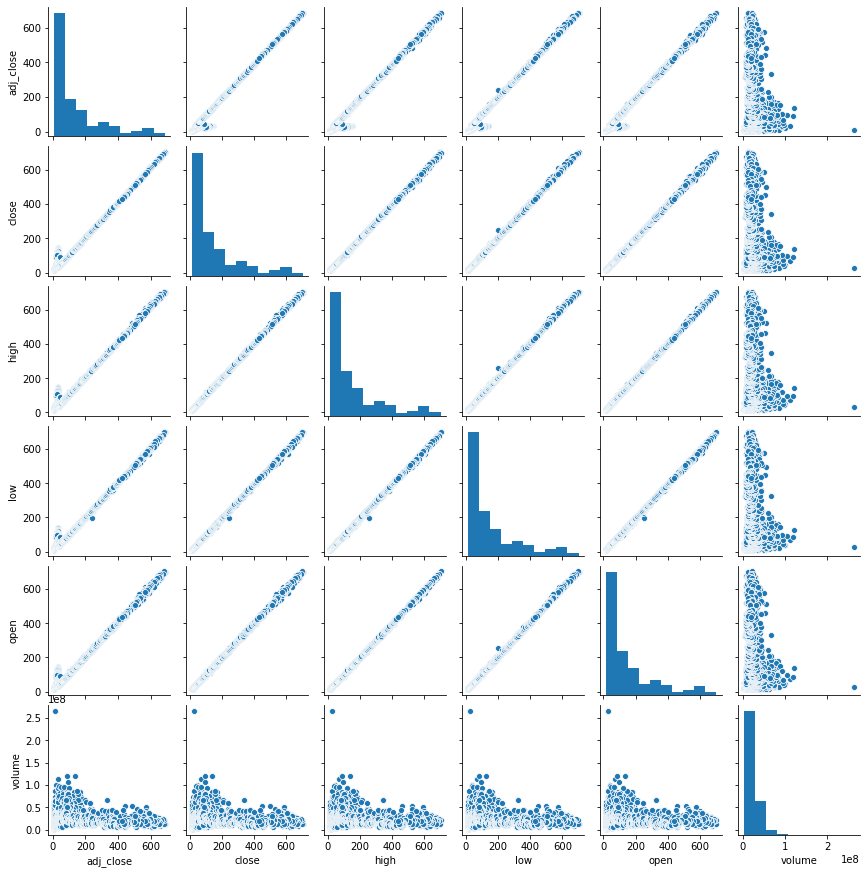

In [44]:
col = ['adj_close', 'close', 'date', 'high', 'low', 'open', 'volume']
sns.pairplot(df[col], size=2.0)

<h3> Calculating covariance </h3>

In [45]:
cols = ['adj_close', 'close', 'high', 'low', 'open']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_std = stdsc.fit_transform(df[cols].iloc[:,range(0,5)].values)

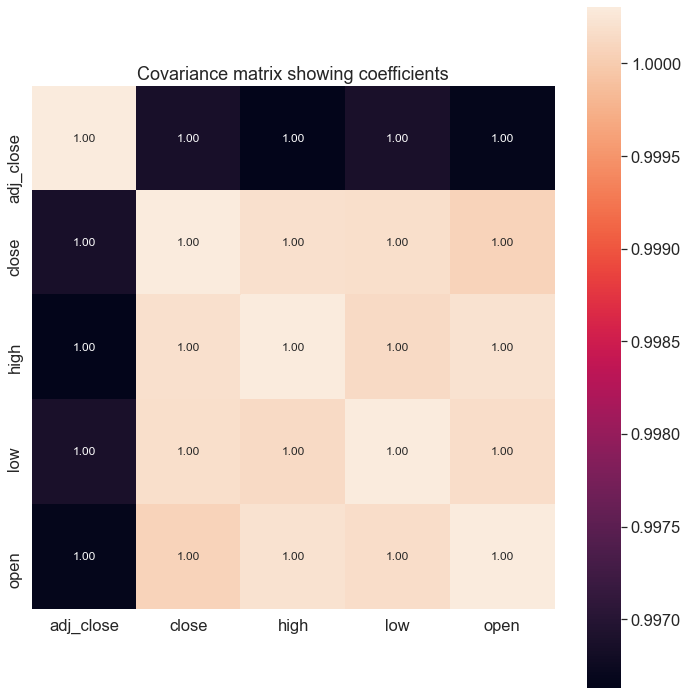

In [50]:
data = np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hema = sns.heatmap(data, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=cols, xticklabels=cols)
plt.title('Covariance matrix showing coefficients')
plt.tight_layout()
plt.show()

<h3 style="color:red">         ? ? ? ? ikr 🤷‍♂️🤷🏿‍♂️ Beats me how covariance matrix is all a table of ones</h3>

<h2>Splitting the data set into training data and test data</h2>

In [54]:
#from sklearn.model_selection import train_test_split
#X = df[cols].iloc[:,0:4].values
#y = df[cols]['open']

In [57]:
#x_train, y_train, x_test, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

<h3> Building a regression model</h3>

In [61]:
X=df[['adj_close', 'close', 'high', 'low']]
y=df['open']

In [62]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(X,y)

LinearRegression()

In [63]:
X.shape

(3270, 4)

In [64]:
ln.coef_

array([ 0.01058177, -0.62677159,  0.97655556,  0.63793998])

In [66]:
ln.intercept_

-0.10918536650504507

<h3>Evaluating My Model</h3>

(0.0, 738.2250625462383)

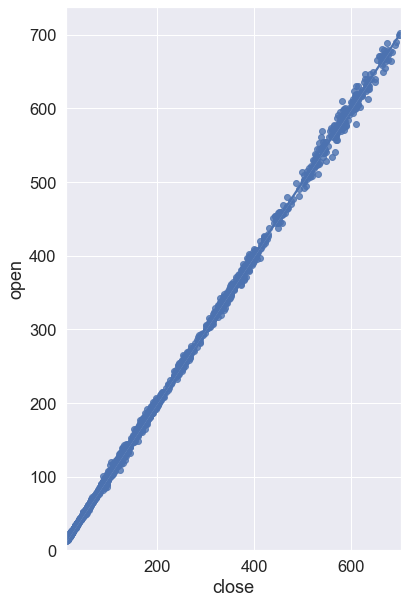

In [73]:
plt.figure(figsize=(6,10))
sns.regplot(x='close', y='open', data=df)
plt.ylim(0,)

(0.0, 736.881)

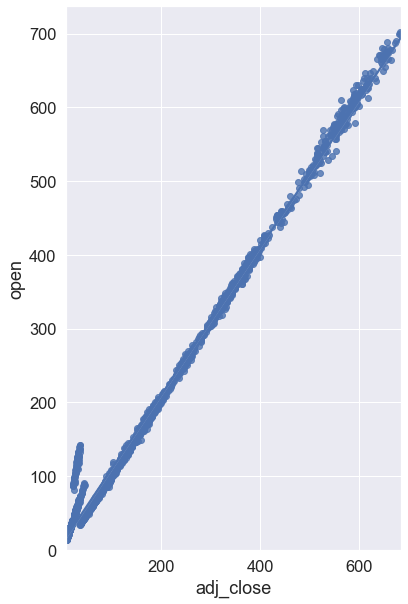

In [74]:
plt.figure(figsize=(6,10))
sns.regplot(x='adj_close', y='open', data=df)
plt.ylim(0,)

(0.0, 736.9087431837463)

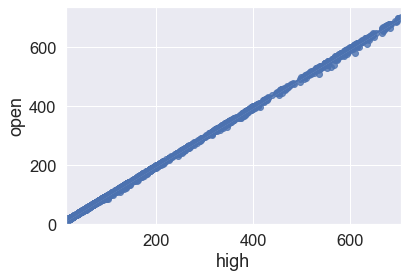

In [75]:
sns.regplot(x='high', y='open', data=df)
plt.ylim(0,)

(0.0, 743.0264677744321)

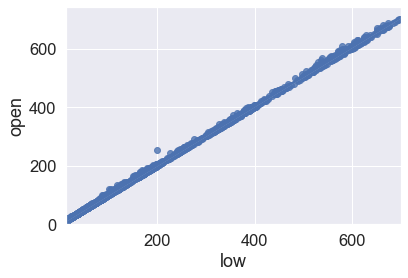

In [76]:
sns.regplot(x='low', y='open', data=df)
plt.ylim(0,)

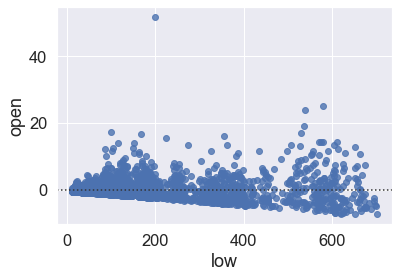

In [77]:
sns.residplot(x='low', y='open', data=df)
plt.show()

<h3 style="color:green">If the data points in the X-axis are randomly distributed, we can use multiple regression</h3>

In [78]:
y_pred = ln.predict(X)

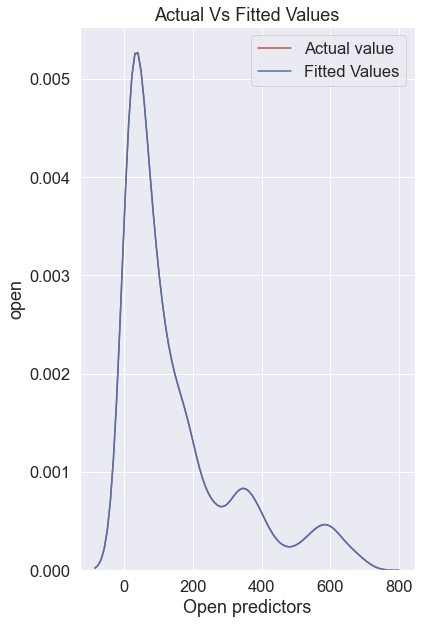

In [82]:
plt.figure(figsize=(6,10))
aa = sns.distplot(df['open'], hist=False, color='r', label='Actual value')
sns.distplot(y_pred, hist=False, color='b', label='Fitted Values', ax=aa)

plt.title('Actual Vs Fitted Values')
plt.xlabel('Open predictors')
plt.ylabel('open')

plt.show()
plt.close()

<h3 style="color:indigo">They map on top of each other😂😂😂</h3>

<h2>Now Lets check for multicolliniarity</h2>

In [83]:
ln.score(X,y)

0.9999186701110655

In [86]:
from sklearn.metrics import r2_score

r2=r2_score(y, y_pred)

<h5>Finding Tolerance</h5>

In [89]:
#tolerance = 1-R2
tolerance = 1-r2
tolerance

8.132988893450044e-05

<h5>Finding VIF(Variance Inflation Factor)<h5>

In [91]:
#VIF = 1/Tolerance
VIF = 1/tolerance
VIF

12295.602675731632

<h2 style="color:red">The above data set is plagued with multicolliniarity. We see this by the VIF 12295.602675731632. </h2>
<p style="color:yellow"> The general rule of thumb is that VIFs exceeding 4 warrant further investigation, while VIFs exceeding 10 are signs of serious multicollinearity requiring correction.</p>
<p>Hence it is impossible to predict anything from the above data set</p>